In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [4]:
import quandl
quandl.ApiConfig.api_key="oFwpZnUsBQoHmHysxME5"
data=quandl.get("EOD/AAPL")

In [5]:
data.replace(np.nan,-99999)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,493.10,500.600,487.350,488.580,11854600.0,0.0,1.0,15.569965,15.806782,15.388405,15.427243,331928800.0
2013-09-04,499.56,502.240,496.280,498.691,12322600.0,0.0,1.0,15.773944,15.858566,15.670375,15.746504,345032800.0
2013-09-05,500.25,500.680,493.640,495.270,8441700.0,0.0,1.0,15.795731,15.809308,15.587016,15.638484,236367600.0
2013-09-06,498.44,499.380,489.950,498.220,12840200.0,0.0,1.0,15.738579,15.768260,15.470501,15.731632,359525600.0
2013-09-09,505.00,507.920,503.480,506.170,12167400.0,0.0,1.0,15.945715,16.037916,15.897720,15.982659,340687200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,174.17,176.020,174.100,175.010,20949896.0,0.0,1.0,41.766290,42.209923,41.749504,41.967723,83799584.0
2017-12-22,174.68,175.424,174.500,175.010,16349444.0,0.0,1.0,41.888589,42.067001,41.845424,41.967723,65397776.0
2017-12-26,170.80,171.470,169.679,170.570,33185536.0,0.0,1.0,40.958157,41.118825,40.689340,40.903003,132742144.0


In [6]:
data.shape

(1090, 12)

In [7]:
data

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,493.10,500.600,487.350,488.580,11854600.0,0.0,1.0,15.569965,15.806782,15.388405,15.427243,331928800.0
2013-09-04,499.56,502.240,496.280,498.691,12322600.0,0.0,1.0,15.773944,15.858566,15.670375,15.746504,345032800.0
2013-09-05,500.25,500.680,493.640,495.270,8441700.0,0.0,1.0,15.795731,15.809308,15.587016,15.638484,236367600.0
2013-09-06,498.44,499.380,489.950,498.220,12840200.0,0.0,1.0,15.738579,15.768260,15.470501,15.731632,359525600.0
2013-09-09,505.00,507.920,503.480,506.170,12167400.0,0.0,1.0,15.945715,16.037916,15.897720,15.982659,340687200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,174.17,176.020,174.100,175.010,20949896.0,0.0,1.0,41.766290,42.209923,41.749504,41.967723,83799584.0
2017-12-22,174.68,175.424,174.500,175.010,16349444.0,0.0,1.0,41.888589,42.067001,41.845424,41.967723,65397776.0
2017-12-26,170.80,171.470,169.679,170.570,33185536.0,0.0,1.0,40.958157,41.118825,40.689340,40.903003,132742144.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1090 entries, 2013-09-03 to 2017-12-28
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1090 non-null   float64
 1   High        1090 non-null   float64
 2   Low         1090 non-null   float64
 3   Close       1090 non-null   float64
 4   Volume      1090 non-null   float64
 5   Dividend    1090 non-null   float64
 6   Split       1090 non-null   float64
 7   Adj_Open    1090 non-null   float64
 8   Adj_High    1090 non-null   float64
 9   Adj_Low     1090 non-null   float64
 10  Adj_Close   1090 non-null   float64
 11  Adj_Volume  1090 non-null   float64
dtypes: float64(12)
memory usage: 110.7 KB


C:\Users\chara\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\chara\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


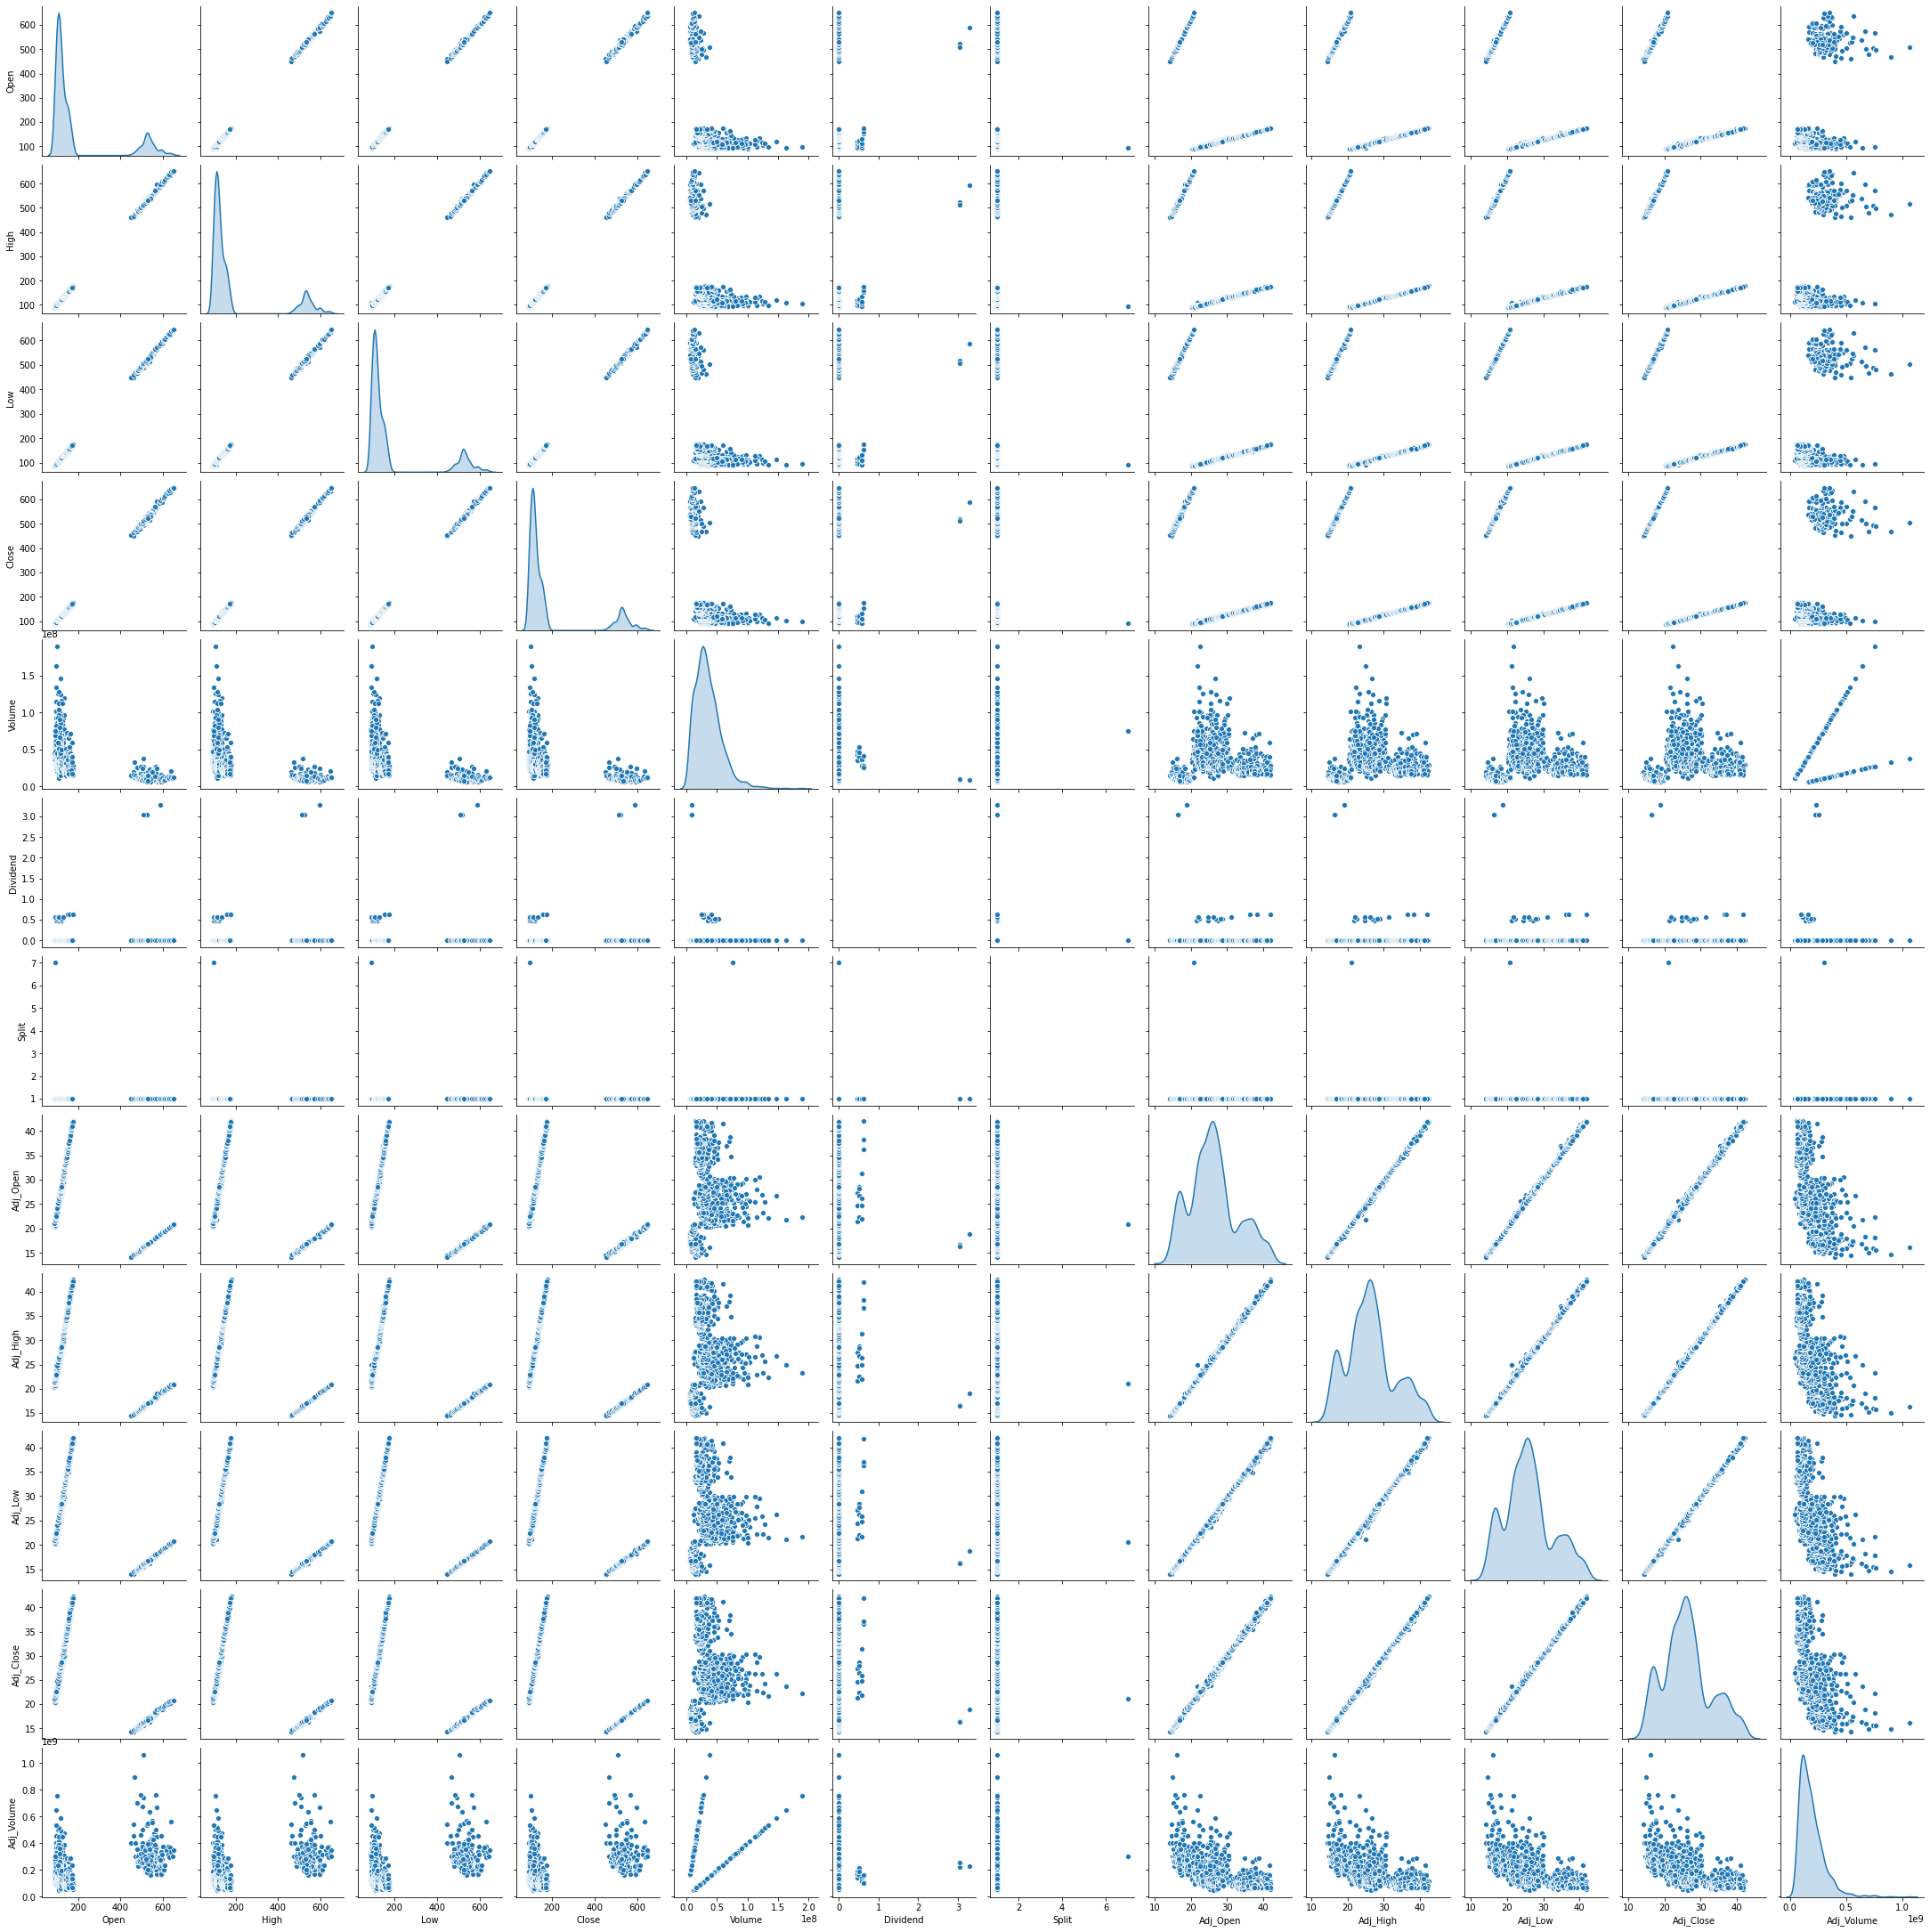

In [9]:
import seaborn as sns
data.dtypes
sns.pairplot(data,diag_kind='kde')

In [10]:
data["Split"].value_counts()

1.0    1089
7.0       1
Name: Split, dtype: int64

## Feature Engineering

In [11]:
data['HL_PCT']=(data["Adj_High"]-data["Adj_Low"])/(data["Adj_Close"]*100)
data['PCT_change']=(data["Adj_Close"]-data["Adj_Open"])/(data["Adj_Open"]*100)

In [12]:
data.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Date,,,,,,,,,,,,,,
2013-09-03,493.10,500.60,487.35,488.580,11854600.0,0.0,1.0,15.569965,15.806782,15.388405,15.427243,331928800.0,0.000271,-0.000092
2013-09-04,499.56,502.24,496.28,498.691,12322600.0,0.0,1.0,15.773944,15.858566,15.670375,15.746504,345032800.0,0.000120,-0.000017
2013-09-05,500.25,500.68,493.64,495.270,8441700.0,0.0,1.0,15.795731,15.809308,15.587016,15.638484,236367600.0,0.000142,-0.000100
2013-09-06,498.44,499.38,489.95,498.220,12840200.0,0.0,1.0,15.738579,15.768260,15.470501,15.731632,359525600.0,0.000189,-0.000004
2013-09-09,505.00,507.92,503.48,506.170,12167400.0,0.0,1.0,15.945715,16.037916,15.897720,15.982659,340687200.0,0.000088,0.000023


In [13]:
corr = data.corr()#Correlation Coefficients

In [14]:
corr

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Open,1.000000,0.999948,0.999935,0.999866,-0.547597,0.088894,-0.019234,-0.534445,-0.537418,-0.531829,-0.534399,0.502054,-0.070638,-0.001925
High,0.999948,1.000000,0.999941,0.999944,-0.545893,0.088582,-0.019154,-0.535283,-0.538038,-0.532575,-0.534990,0.504125,-0.067059,0.004293
Low,0.999935,0.999941,1.000000,0.999949,-0.550156,0.089065,-0.019259,-0.533844,-0.536724,-0.530960,-0.533517,0.498174,-0.075698,0.004990
Close,0.999866,0.999944,0.999949,1.000000,-0.548315,0.088610,-0.019044,-0.534448,-0.537173,-0.531552,-0.533903,0.500617,-0.071773,0.010583
Volume,-0.547597,-0.545893,-0.550156,-0.548315,1.000000,-0.061064,0.054382,0.085888,0.095572,0.071723,0.081938,0.337092,0.609783,-0.076145
Dividend,0.088894,0.088582,0.089065,0.088610,-0.061064,1.000000,-0.002708,-0.050353,-0.051215,-0.050306,-0.051095,0.002395,-0.023520,-0.015082
Split,-0.019234,-0.019154,-0.019259,-0.019044,0.054382,-0.002708,1.000000,-0.024993,-0.024640,-0.025124,-0.023978,0.029564,0.019444,0.027797
Adj_Open,-0.534445,-0.535283,-0.533844,-0.534448,0.085888,-0.050353,-0.024993,1.000000,0.999528,0.999416,0.998987,-0.549990,-0.133494,-0.018729
Adj_High,-0.537418,-0.538038,-0.536724,-0.537173,0.095572,-0.051215,-0.024640,0.999528,1.000000,0.999278,0.999526,-0.544404,-0.117588,0.003561
Adj_Low,-0.531829,-0.532575,-0.530960,-0.531552,0.071723,-0.050306,-0.025124,0.999416,0.999278,1.000000,0.999558,-0.560073,-0.154542,0.005597


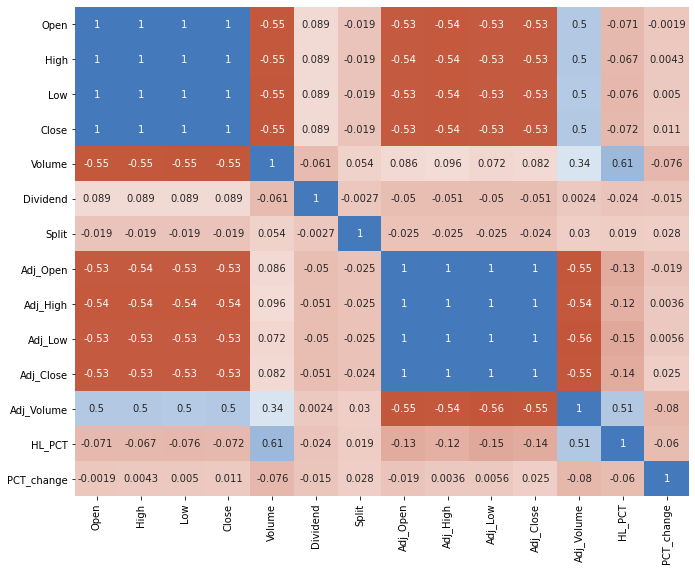

In [15]:
import seaborn as sns
plt.subplots(figsize=(11,9))
cmap=sns.diverging_palette(20,250,as_cmap=True)
sns.heatmap(data.corr(), annot = True,cbar=False,cmap=cmap)

## Feature Selection 

In [16]:
df=pd.DataFrame(data[["Adj_Close","Adj_Volume","HL_PCT","PCT_change"]])

In [17]:
df.head()
type(df)

pandas.core.frame.DataFrame

In [18]:
df.shape

(1090, 4)

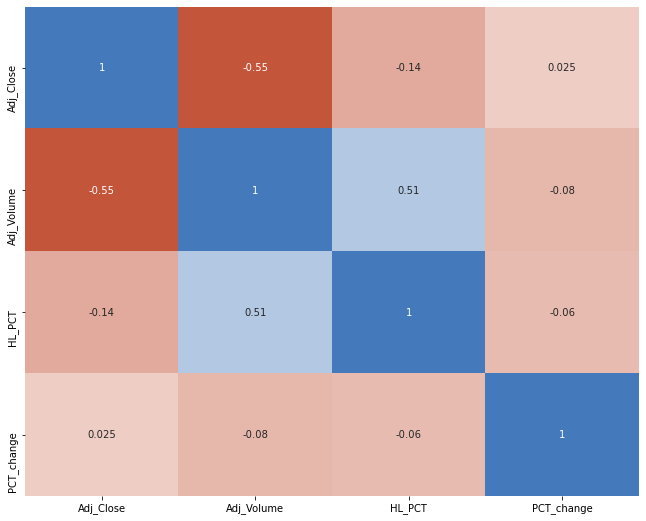

In [19]:
plt.subplots(figsize=(11,9))
cmap=sns.diverging_palette(20,250,as_cmap=True)
sns.heatmap(df.corr(), annot = True,cbar=False,cmap=cmap)

In [20]:
x=(data[["Adj_Volume","Adj_Open","Adj_High","Adj_Low","HL_PCT","PCT_change"]])
x_lately=x[-10:]
x=x[:-10]
label=data["Adj_Close"].shift(-10)
label.dropna(inplace=True)
y=np.array(label)
y.shape

(1080,)

In [21]:
x.shape

(1080, 6)

In [22]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [23]:
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler().fit(x_train)
x_train = norm.transform(x_train)
x_test=norm.transform(x_test)
x_lately=norm.transform(x_lately)

## implementing the model 

In [24]:

lg=LinearRegression()
lg.fit(x_train,y_train)


LinearRegression()

In [25]:
pred=lg.predict(x_test)

In [26]:
res=pd.DataFrame({"actual values":y_test,"predicted values":pred})
res

,actual values,predicted values
0,33.758979,34.512920
1,36.993181,36.590954
2,22.779237,22.976951
3,27.468678,25.722073
4,23.447085,21.176123
...,...,...
319,38.173062,36.779519
320,16.533272,16.816471
321,41.769110,37.799928
322,26.383581,26.539766


In [27]:
x_lately_pred=lg.predict(x_lately)
x_lately_pred

array([41.52766888, 41.72040397, 42.55883683, 42.03819698, 41.90803507,
       42.28777316, 42.2213148 , 41.04296586, 41.08441022, 41.27693334])

In [28]:
print("intercept is",lg.intercept_)
print("cofficent",lg.coef_)

intercept is 13.731614023476295
cofficent [-0.35349186 -7.81004883  5.5904144  29.75806676  2.16647892  1.95432096]


In [29]:

mse=mean_squared_error(y_test,pred)
print("MSE: ",mse)

MSE:  1.5036964979023448


## Univariate 

In [30]:
import pandas
from pandas import DataFrame
from pandas import concat
import numpy
def series_to_supervised(data,lag=1,forc=1,dropnan=True):
    n_vars=1 if type(data) is pandas.core.frame.DataFrame else data.shape[0]
    df=DataFrame(data)
    cols,names=list(),list()
    for i in range(lag,0,-1):
        cols.append(df.shift(i))
        names+=[('var%d(t-%d)' % (j+1,i)) for j in range(n_vars)] 
    for i in range(0,forc):
        cols.append(df.shift(-i))
        if i==0:
            names+=[('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names+=[('var%d(t+%d)' % (j+1,i)) for j in range(n_vars)]
    agg = concat(cols,axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [31]:
value=data[["Adj_Close",]]

In [32]:
newdf=series_to_supervised(value,0,2,dropnan=True)
newdf

,var1(t),var1(t+1)
Date,,
2013-09-03,15.427243,15.746504
2013-09-04,15.746504,15.638484
2013-09-05,15.638484,15.731632
2013-09-06,15.731632,15.982659
2013-09-09,15.982659,15.618591
...,...,...
2017-12-20,41.809454,41.967723
2017-12-21,41.967723,41.967723
2017-12-22,41.967723,40.903003


In [33]:
y=np.array(newdf['var1(t+1)'])
x=np.array(newdf['var1(t)'])

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [35]:
x_train=x_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [36]:
reg=LinearRegression()
reg.fit(x_train,y_train)
score=reg.score(x_test,y_test)
y_pred=reg.predict(x_test)

In [37]:
mse=mean_squared_error(y_test,y_pred)
mse


0.11782168803114511

## Multivariate

In [38]:
import pandas
from pandas import DataFrame
from pandas import concat
import numpy
def series_to_supervised(data,lag=1,forc=1,dropnan=True):
    n_vars=1 if type(data) is numpy.ndarray else data.shape[1]
    df=DataFrame(data)
    cols,names=list(),list()
    for i in range(lag,0,-1):
        cols.append(df.shift(i))
        names+=[('var%d(t-%d)' % (j+1,i)) for j in range(n_vars)] 
    for i in range(0,forc):
        cols.append(df.shift(-i))
        if i==0:
            names+=[('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names+=[('var%d(t+%d)' % (j+1,i)) for j in range(n_vars)]
    agg = concat(cols,axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg


temp=data[["Adj_Close","Adj_Volume","HL_PCT","PCT_change"]]


In [39]:
newdf=series_to_supervised(temp,0,2,dropnan=True)
newdf

,var1(t),var2(t),var3(t),var4(t),var1(t+1),var2(t+1),var3(t+1),var4(t+1)
Date,,,,,,,,
2013-09-03,15.427243,331928800.0,0.000271,-0.000092,15.746504,345032800.0,0.000120,-0.000017
2013-09-04,15.746504,345032800.0,0.000120,-0.000017,15.638484,236367600.0,0.000142,-0.000100
2013-09-05,15.638484,236367600.0,0.000142,-0.000100,15.731632,359525600.0,0.000189,-0.000004
2013-09-06,15.731632,359525600.0,0.000189,-0.000004,15.982659,340687200.0,0.000088,0.000023
2013-09-09,15.982659,340687200.0,0.000088,0.000023,15.618591,743195600.0,0.000363,-0.000228
...,...,...,...,...,...,...,...,...
2017-12-20,41.809454,93902596.0,0.000124,-0.000030,41.967723,83799584.0,0.000110,0.000048
2017-12-21,41.967723,83799584.0,0.000110,0.000048,41.967723,65397776.0,0.000053,0.000019
2017-12-22,41.967723,65397776.0,0.000053,0.000019,40.903003,132742144.0,0.000105,-0.000013


In [40]:
y=newdf['var1(t+1)']
x=newdf.drop(['var1(t+1)'],axis=1)

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=41)

In [42]:
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler().fit(x_train)
x_train = norm.transform(x_train)
x_test=norm.transform(x_test)
x_lately=x[-200:]
x_lately=norm.transform(x_lately)

In [43]:
reg=LinearRegression()
reg.fit(x_train,y_train)
score=reg.score(x_test,y_test)
forecast = reg.predict(x_lately)
y_pred=reg.predict(x_test)
mse=mean_squared_error(y_test,y_pred)

forecast.shape

(200,)

In [44]:
mse

0.0755981405902344

## Ploting the predicted and actual values

<ipython-input-45-2802cabc1412>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_data["Predictions"]=forecast


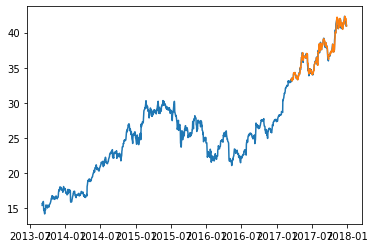

In [45]:
df=data[-1090:]
pred_data=data[-200:]
pred_data["Predictions"]=forecast
plt.plot(df[["Adj_Close"]])
plt.plot(pred_data[["Predictions"]])